In [7]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

data = [
        {
'Topic': '',
'Surah': '',
'Islamic_Data': '',
'Scientific_Data': ''
},


{
'Topic': "Spider's Web",
'Surah': 'Al-Ankabut',
'Islamic_Data': '"The parable of those who take protectors other than Allah is that of the spider, who builds (to itself) a house; but truly the flimsiest of houses is the spider’s house; if they but knew."',
'Scientific_Data': 'The verse likens the flimsiness of the spider’s web to the fragility of relying on false protectors. It also reflects the delicate nature of a spider’s web, which is made of silk proteins.'
},    
    {
'Topic': 'The Water Cycle',
'Surah': 'Az-Zumar',
'Islamic_Data': '"Seest thou not that Allah sends down rain from the sky, and leads it through springs in the earth? Then He causes to grow, therewith, produce of various colors."',
'Scientific_Data': 'The verse metaphorically describes the water cycle, where water evaporates, forms clouds, and eventually falls as rain. This process sustains plant growth and various ecosystems on Earth.'
},
{
'Topic': 'Water',
'Surah': 'Al-Anbya',
'Islamic_Data': '"We made every living thing from water, will they not believe?"',
'Scientific_Data': 'It was only after the discovery of the microscope that it was concluded...'
},
    
{
'Topic': 'Universe: The Big Crunch Theory',
'Surah': 'Al-Anbya',
'Islamic_Data': '"The Day when We will fold the heaven like the folding of a [written] sheet for the records. As We began the first creation, We shall repeat it. [It is] a promise binding upon Us. Indeed, We will do it."',
'Scientific_Data': 'Indeed, the Big Crunch is one of the scenarios predicted by scientists in which the Universe may end...'
},
{
'Topic': 'Barrier between Sweet and Salt Waters',
'Surah': '',
'Islamic_Data': 'He has let free the two bodies of flowing water, meeting together: between them is a barrier which they do not transgress.',
'Scientific_Data': 'At the boundary where freshwater rivers meet the ocean, there is a visible separation due to differences in density and␣salinity. This barrier prevents easy mixing of the two types of water.'
},      

   {
'Topic': 'Botany',
'Surah': 'Taha',
'Islamic_Data': '"And has sent down water from the sky. With it have We produced diverse pairs of plants each separate from the others."',
'Scientific_Data': 'Plants reproduce through various methods, including seeds. The verse metaphorically refers to the diversity of plant life and their reproductive processes, which include male and female parts.'
}, {
'Topic': '',
'Surah': '',
'Islamic_Data': '"Seest thou not that Allah sends down rain from the sky, and leads it through springs in the earth? Then He causes to grow, therewith, produce of various colors."',
'Scientific_Data': 'In 1580, Bernard Palissy was the first man to describe the present day concept of the "water cycle." He described how water evaporates from the oceans and forms clouds...'
},  

    
    {
'Topic': 'Production of Milk in Animals',
'Surah': 'Ayah an-Nahl',
'Islamic_Data': '"“There is in truth for you a lesson in your animals and flocks. We give you to drink a pure milk derived from that which is contained in their bodies, from the merging of what is held in their intestines with blood. The drinking of that is then made easy for those who drink it."',
'Scientific_Data': 'The substances that ensure the general nutrition of the body come from chemical transformations which occur along the length of the digestive tract. These substances come from the contents of the intestine. On arrivalin the intestine at the appropriate stage of chemical transformation, they pass through its wall and towards the systemic circulation (of blood). This veryprecise concept is the result of the discoveries made in the chemistry and physiology of the digestive system.'
},
   
{
'Topic': 'The Sky’s Protection',
'Surah': 'Al-Anbya',
'Islamic_Data': '"And We made the sky a protected ceiling, but they, from its signs, are turning away"',
'Scientific_Data': 'It is a scientific fact that the sky, with all of its gases, protects the earth and life that is present on it...'
},
    {
'Topic': 'Force of Gravity',
'Surah': 'Al-Rafi',
'Islamic_Data': '"It is Allah who raised the heavens without any pillars that you see, and then presided over the Throne. He disposed the sun and the moon, each moving for a specified term. He directs the command, [and] elaborates thesigns that you may be certain of encountering your Lord."',
'Scientific_Data': '"We know that before the time of Newton, that great scientific personality, no one was aware of the force of gravity. Newton proved that the falling of objects to earth, the rotation of the moon and the Venus, the motion of the planets, and other instances of attraction are all subject to the single law, the law of universal gravity.'
},

{
'Topic': 'The Meeting of the Seas',
'Surah': 'Ar-Rahman',
'Islamic_Data': '"He released the two seas, meeting [side by side], Between them is a barrier [so] neither of them transgresses"',
'Scientific_Data': 'Science has discovered that in places where two different seas meet, there is a barrier that divides them which has a unique chemical composition...'
},
    {
'Topic': 'Sun Moving in Orbit',
'Surah': 'Al-Anbya',
'Islamic_Data': '"And it is He who created the night and the day and the sun and the moon; all [heavenly bodies] in an orbit are swimming."',
'Scientific_Data': 'Although it was only a widespread belief in the 20th century amongst the astronomers, today it is a well-established fact...'
},
{
'Topic': 'Expansion of the Universe',
'Surah': 'An-Naba',
'Islamic_Data': '"And the heaven We constructed with strength, and indeed, We are [its] expander"',
'Scientific_Data': 'According to the prominent physicist Stephen Hawking in his book A Brief History of Time, “The discovery that the Universe is expanding is one of the great intellectual revolutions of the 20th century..."'
},
{
'Topic': 'Pain Receptors',
'Surah': 'Adh-Dhariyat',
'Islamic_Data': '"For a long time it was thought that the sense of feeling and pain was dependent on the brain. However, it has been discovered that there are pain receptors present in the skin that give us the sense of pain."',
'Scientific_Data': 'For a long time, it was thought that the sense of feeling and pain was dependent on the brain. However, it has been discovered that there are pain receptors in the skin...'
},
    {
'Topic': 'Iron within Meteorites',
'Surah': 'Al-Hadid',
'Islamic_Data': '"We sent down Iron with its great inherent strength and its many benefits for humankind"',
'Scientific_Data': 'According to M. E. Walrath, iron is not natural to the earth. Scientists state that billions of years ago...'
},


{
'Topic': 'Internal Waves in the Oceans',
'Surah': 'An-Nur',
'Islamic_Data': '"Incredibly, oceanographers have stated that unlike the belief that waves only occur on the surface, there are waves deep in then ocean that are as great as 100 feet high."',
'Scientific_Data': 'Incredibly, oceanographers have stated that unlike the belief that waves only occur on the surface, there are waves deep in the ocean that are as great as 100 feet high...'
}]

# Create a DataFrame
df = pd.DataFrame(data)

# Clean and preprocess data
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['cleaned_scientific_data'] = df['Scientific_Data'].apply(clean_text)
df['cleaned_islamic_data'] = df['Islamic_Data'].apply(clean_text)

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
df['Sentiment_Scores'] = df['Islamic_Data'].apply(lambda x: sia.polarity_scores(x)['compound'])

def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Sentiment_Scores'].apply(classify_sentiment)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix_islamic = tfidf_vectorizer.fit_transform(df['cleaned_islamic_data'])
tfidf_matrix_scientific = tfidf_vectorizer.transform(df['cleaned_scientific_data'])
cosine_sim = cosine_similarity(tfidf_matrix_islamic, tfidf_matrix_scientific)

# Data analysis
#  let's calculate and print the average sentiment score
average_sentiment = df['Sentiment_Scores'].mean()
print(f"Average Sentiment Score: {average_sentiment:.2f}")



Average Sentiment Score: 0.29


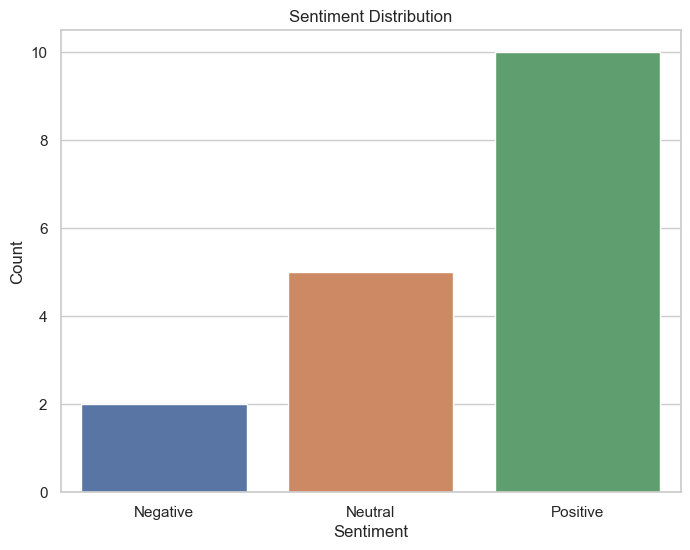

In [8]:
# Data visualization
# For example, let's create a bar plot of sentiment distribution
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', order=['Negative', 'Neutral', 'Positive'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

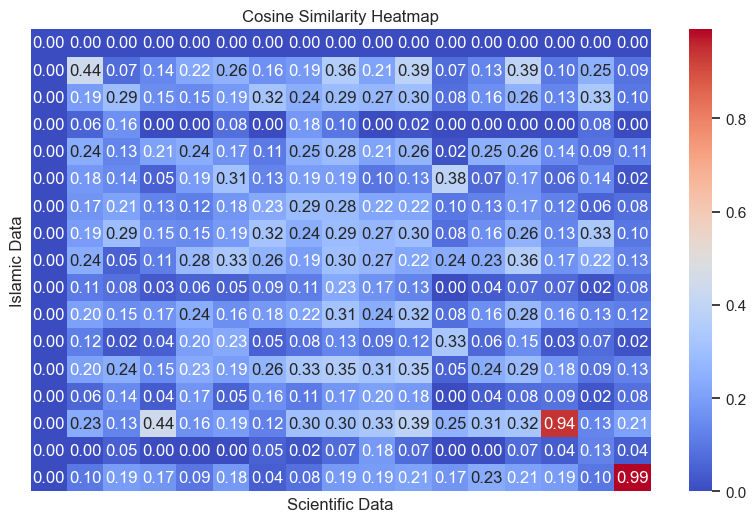

In [9]:
# Create a heatmap based on cosine similarity
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(cosine_sim, cmap="coolwarm", annot=True, fmt=".2f", xticklabels=False, yticklabels=False)
plt.title('Cosine Similarity Heatmap')
plt.xlabel('Scientific Data')
plt.ylabel('Islamic Data')
plt.show()



# Save results to a CSV file
df.to_csv('project_results.csv', index=False)


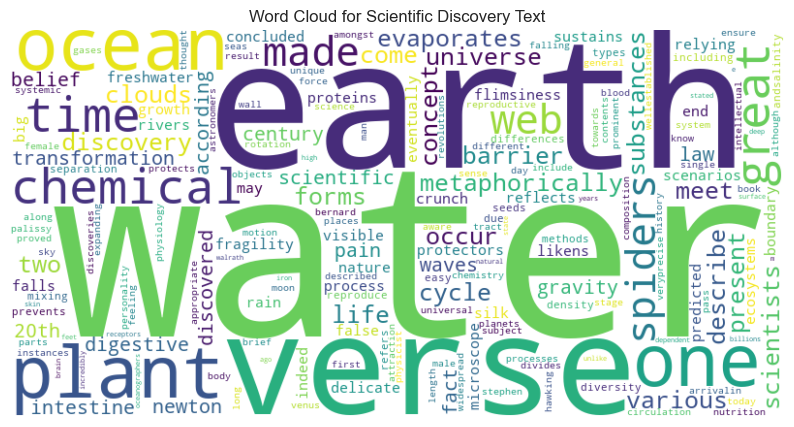

In [10]:
from wordcloud import WordCloud

scientific_discovery_text = ' '.join(df['cleaned_scientific_data'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(scientific_discovery_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Scientific Discovery Text')
plt.show()



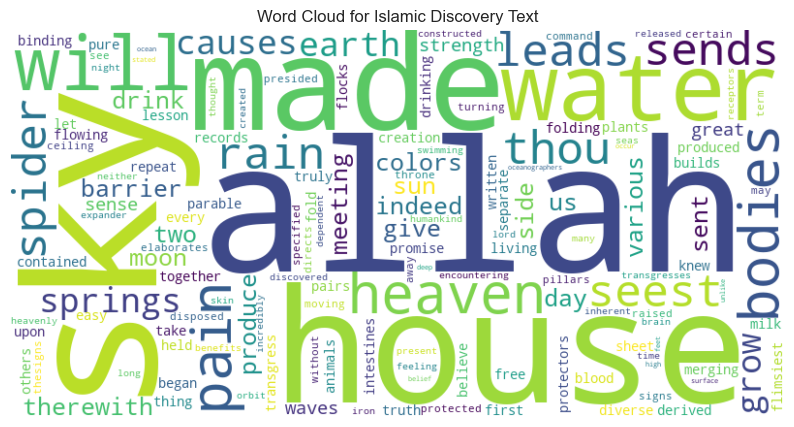

In [11]:
# Create a word cloud for Islamic discovery text
islamic_discovery_text = ' '.join(df['cleaned_islamic_data'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(islamic_discovery_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Islamic Discovery Text')
plt.show()

In [12]:
tf_vectorizer = TfidfVectorizer()
tfidf_matrix_islamic = tf_vectorizer.fit_transform(df['cleaned_islamic_data'])
# Transform the scientific data using the same vectorizer
tfidf_matrix_scientific = tf_vectorizer.transform(df['cleaned_scientific_data'])
cosine_sim = cosine_similarity(tfidf_matrix_islamic, tfidf_matrix_scientific)
# Print the cosine similarity matrix
print(" Similarity of Cosine Matrix:\n")
print(cosine_sim)

 Similarity of Cosine Matrix:

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.43742876 0.07073444 0.13809974 0.22113601 0.25888359
  0.15947401 0.18570349 0.35882758 0.20998142 0.38550253 0.07240659
  0.13437536 0.39337985 0.10074165 0.24757998 0.0864099 ]
 [0.         0.19244033 0.29180107 0.15171334 0.14636704 0.18610311
  0.31545799 0.24081301 0.28844613 0.27275597 0.29777782 0.07876493
  0.15789504 0.25679815 0.13393443 0.33313579 0.09861124]
 [0.         0.05679424 0.15950957 0.         0.         0.0779051
  0.         0.1779514  0.09803723 0.         0.01817974 0.
  0.         0.         0.         0.07965488 0.        ]
 [0.         0.23788102 0.13049206 0.20673835 0.23922723 0.16803607
  0.10616023 0.24763006 0.28327515 0.2118109  0.26338547 0.01715216
  0.24729637 0.25805695 0.1424751  0.09015304 0.11246831]
 [0.         0.17962008 